In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
FILEPATH = "/media/navar/LargeData/Navar/Cursos/Hands-on Machine Learning with scikit-learn and tensorflow/handson-ml/datasets/housing";
FILENAME = '/housing.csv'

def load_housing_data(housing_path):
    return pd.read_csv(housing_path)

housing = load_housing_data(FILEPATH + FILENAME)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

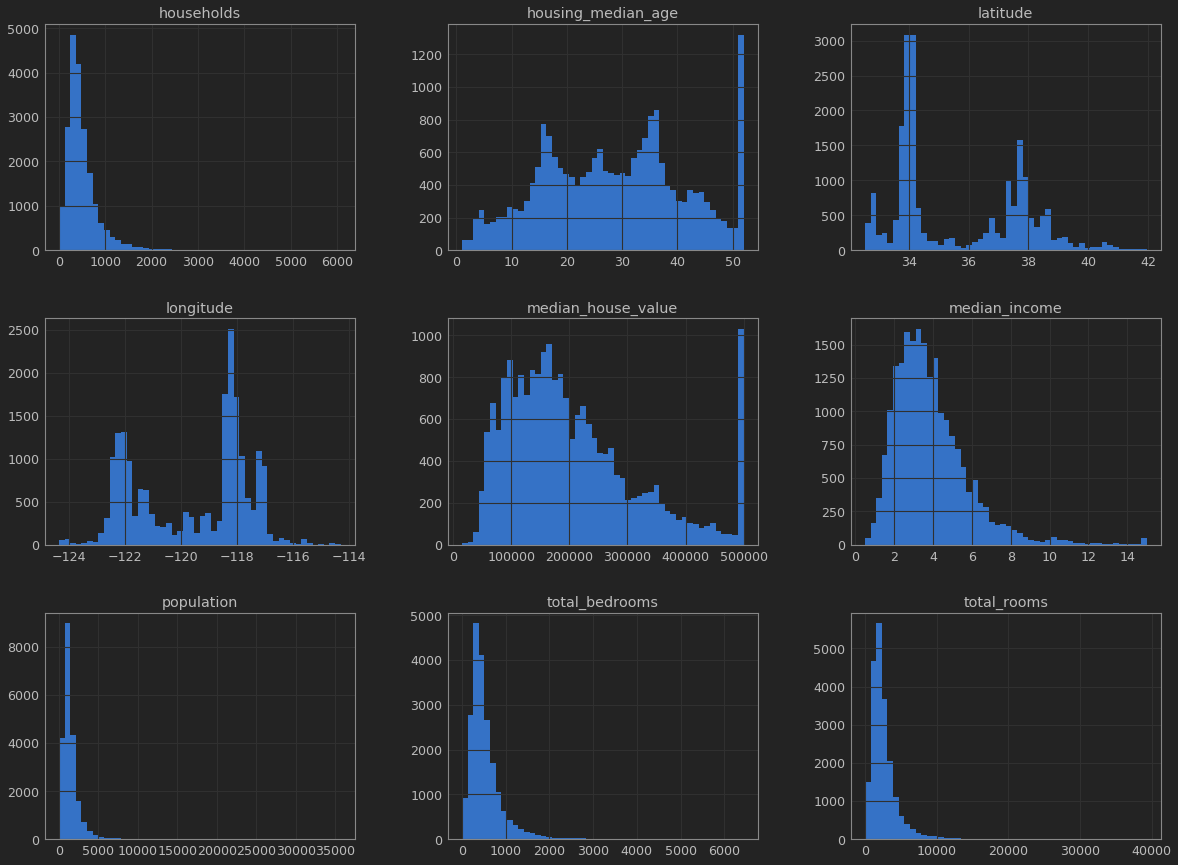

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Not good doing random split because could introduce sampling bias:

In [8]:
housing_train, housing_test = model_selection.train_test_split(housing, test_size=0.2)

In [9]:
print("Train size: {} | Test size: {}" .format(len(housing_train), len(housing_test)))

Train size: 16512 | Test size: 4128


## Trying to do stratified sampling:

In [10]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

In [11]:
housing['income_cat'].where(housing['income_cat'] < 5, other=5, inplace=True)
housing['income_cat'].hist()

In [12]:
spliter = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spliter.split(housing, housing['income_cat']):
    start_train_set = housing.loc[train_idx]
    start_test_set = housing.loc[test_idx]

### Removing income category created for sampling:

In [13]:
for set_ in (start_train_set, start_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [14]:
# save the train test set in news csv:

start_train_set.to_csv(FILEPATH + '/' + 'housing_train.csv')
start_test_set.to_csv(FILEPATH + '/' + 'housing_test.csv')


### Visualize data

In [15]:
# create a copy of the data:
housing = start_train_set.copy()

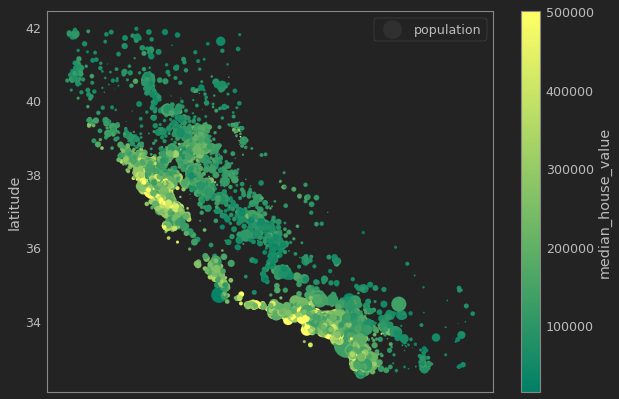

In [83]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=1, 
             figsize=(10,7), s=housing['population']/50,
             c='median_house_value', cmap = plt.get_cmap('summer'), colorbar = True,
             label='population')
plt.grid(False)
plt.show()

### Looking for correlations:

In [88]:
corr_matrix = housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending = False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


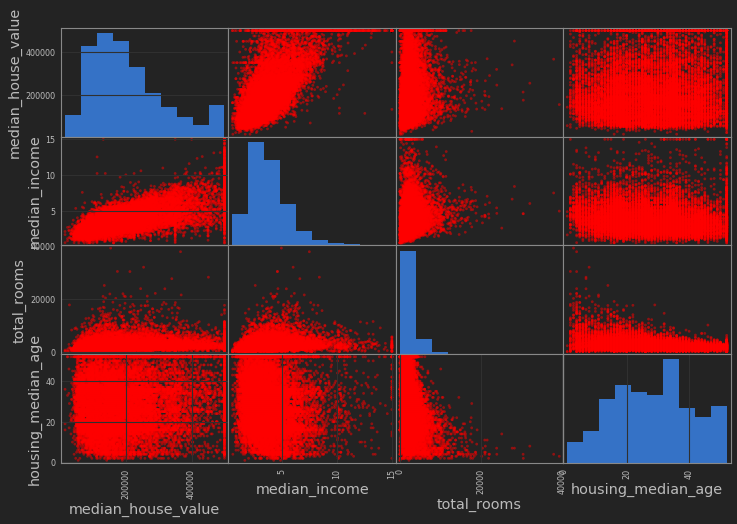

In [95]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8), c='red')
plt.show()